# Project: Product Sales Forecasting

This jupyter notebook have the followin sections: 

1. Business Problem
2. Dataset-Background 
3. Exploratory Analysis and Visualization
4. Model Selection
5. Discussion

In [1]:
# import libraries 
import sys
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn
import seaborn as sns 

from fbprophet import Prophet

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))

import warnings
warnings.filterwarnings("ignore")

In C:\Users\Mohammed\Anaconda3\envs\tfgpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Mohammed\Anaconda3\envs\tfgpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Mohammed\Anaconda3\envs\tfgpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Mohammed\Anaconda3\envs\tfgpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Mohammed\Anaconda3\envs\

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.0.4
Numpy: 1.18.1
Matplotlib: 3.3.0
Seaborn: 0.10.0


# 1. Business Problem:

Sales department wants to develop a promotion plan to increase their daily sales and skyrocket their growth. The department wants to use historical data for past years sales to predict future daily sales using ML Facebook prophet model. 

In this project, we attempt to forecast future sales based on 2.5 years historical records for 1115 stores while taking into account seasonality effects, demands, holidays.  

# 2. Dataset-Background 

The datasets contains sales information for 1115 stores from 2013 to 2015.The data is given in two separate files. The first file contains 9 columns and 1,017,209 rows while second file contains information about store type, competition and promotions. 

**First file:**

* Store: unique store id 
* DayOfWeek: 7 for Sunday and 1 for Monday
* Date
* Sales: sales per day
* Customers: number of customers per day
* Open: 1 = store is open on that day, and 0 = close. 
* Promo: describes if store is running a promo on that day or not. 
* StateHoliday: indicates which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
* SchoolHoliday: indicates if the (Store, Data) was affected by the closure of public schools. 


**Second file:** 

* Store: unique store id will be later used to merge 2 data.             
* StoreType: categorical variable to indicate type of store (a,b,c,d), not clearly defined by data owner.   
* Assortment: describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance (meters): distance to closet competitor store.        
* CompetitionOpenSinceMonth: provides an estimate of the date when competition was open month.  
* CompetitionOpenSinceYear: rovides an estimate of the date when competition was open year.   
* Promo2: Promo2 is a continuing and consecutive promotion for some store (0 = store is not participating, 1 store is participating)     
* Promo2SinceWeek: date when store started participating in Promo2 since a week.
* Promo2SinceYear: date when store started participating in Promo2 since a year.         
* PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started new. 

# 3. Exploratory Data Analysis

## 3.1 Data Exploration & Preparation

In this section, we explorer data by looking at data type and its features, check missing values or any trends associated with missing values, check duplicates, and understand statistics behind data columns and what it can tell us about data. 

In [2]:
# Reading the data 
df_1 = pd.read_csv("train.csv")
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [3]:
# Display data
df_1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# Check missing value
df_1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [5]:
# Check if we have any duplicates
df_1.duplicated().sum()

0

In [6]:
# Get statistics about data
df_1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# Obtain early date
print('The early date',df_1['Date'].min())
print('The lastest date',df_1['Date'].max())

The early date 2013-01-01
The lastest date 2015-07-31


In [8]:
# Get count of unique store
df_1['Store'].nunique()

1115

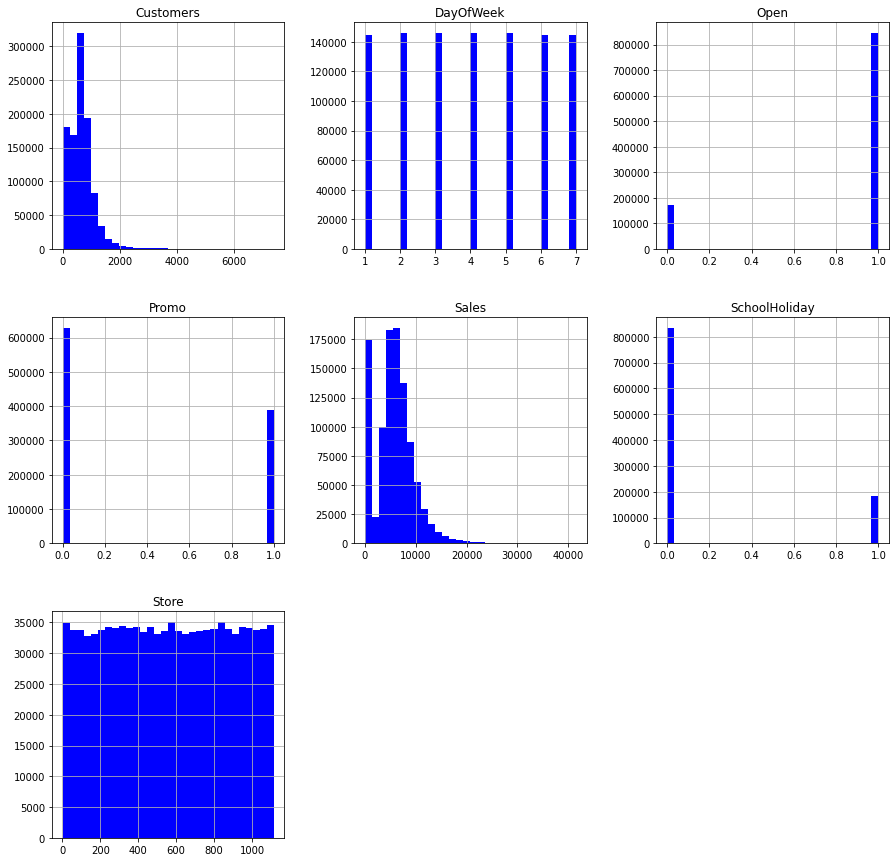

In [9]:
# Since data is clean, let's explore some trends
df_1.hist(bins=30, figsize=(15,15), color = 'blue');

**Quick Data Exploration Summary**

* Data records are for about 2.5 years.
* 9 columns, 8 features and 1 target (Sales).
* There are 1115 unique stores.
* Million observations. 
* Average sale per day is 5,774, minimum sale is 0, and maximum sale per day is 41,551 this store must have strategic location. 
* Average number of customers is around 633 per day, minimum sale is 0 and maximum number of customers is 7388. 
* Day of the week is equally distributed.
* Stores are 82% open and 18% close. 
* Promo is running only 40% of the time. 
* School holidays are around 18% of time

Since we have seen that 82% of stores are open which means days where stores are closed do not sales. Therefore, we will remove those days. 

In [10]:
# Removing days where store is close
df_1 = df_1[df_1['Open'] == 1]

# Drop Open column after selecting only open days
df_1.drop('Open',axis=1,inplace=True)
df_1.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [11]:
# Reading the second file 
df_2 = pd.read_csv("store.csv")
# Displaying information about the data
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
# Statistics information
df_2.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [13]:
# Checking missing values
df_2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [14]:
# Let's see duplicates 
df_2.duplicated().sum()

0

* Data records are for about 2.5 years.
* 10 columns as features. 
* There are 1115 unique stores, 1115 observations.
* Average competition distance is 5,404 meter, minimum competition distance is 20 meter and maximum distance is 75,860.

Since we have some NaN values, statistics here may change! It would be good idea to understand why NaN values existed, does that related to specific feature? Let's discover it!

**Filling NaN Values:** 
* For 3 NaN values in the CompetitionDistance column, we fill them with median. 

* PromoInterval and Promo2Since columns have 544 NaN values. In fact, we figure out that they are directly correlated with Promo2 column, whenever Promo2 entry is zero, Promo2Since and PromoInterval are NaNs. Therefore, those NaN values are filled with ZERO. 

* There is no direct relation with other features for both CompetitionOpenSinceMonth and CompetitionOpenSinceYear NaN values, we fill those NaN with ZERO again. 

**Note:** 

I intentially fill those values with ZERO to perserve time sequence, it is TIME SERIES problem and sequence is crucial here.


In [15]:
# Let's see Promo2SinceWeek 544 null values 
df_2[df_2['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [16]:
# Let's see Promo2SinceWeek 544 null values 
df_2[df_2['Promo2SinceWeek'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [17]:
# Let's see CompetitionOpenSinceMonth 354 null values 
df_2[df_2['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [18]:
# Let's see CompetitionOpenSinceYear 354 null values 
df_2[df_2['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [19]:
# Other NaN values are filled with zeros
NaN_col = ['Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionOpenSinceYear','CompetitionOpenSinceMonth']
for j in NaN_col:
    df_2.loc[df_2[j].isnull(),j] = 0

In [20]:
# Filling Distance column with Median 
df_2['CompetitionDistance'].fillna(df_2['CompetitionDistance'].median(),inplace=True)

In [21]:
# Checking missing values after filling NaN values
df_2.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [22]:
# Statistics 
df_2.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5396.614350,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7654.513635,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2325.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


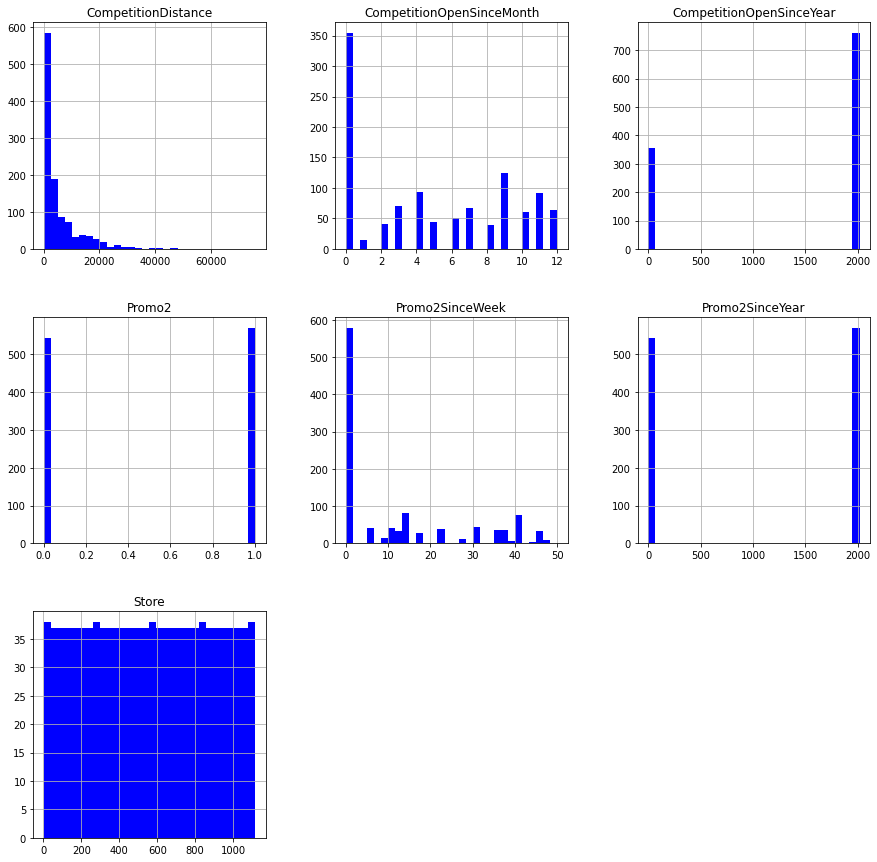

In [23]:
# Since data is clean, let's explore some trends
df_2.hist(bins=30, figsize=(15,15), color = 'blue');

In [24]:
# Display frequency of competition open since month
df_2.groupby(df_2['CompetitionOpenSinceMonth'])['CompetitionOpenSinceMonth'].count().sort_values(ascending=False)

CompetitionOpenSinceMonth
0.0     354
9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64

In [25]:
# Display frequency of competition open since year
df_2.groupby(df_2['CompetitionOpenSinceYear'])['CompetitionOpenSinceYear'].count().sort_values(ascending=False)

CompetitionOpenSinceYear
0.0       354
2013.0     83
2012.0     82
2014.0     70
2005.0     62
2010.0     55
2011.0     54
2009.0     54
2008.0     54
2007.0     48
2006.0     47
2015.0     38
2002.0     27
2004.0     22
2003.0     19
2001.0     16
2000.0     10
1999.0      8
1990.0      5
1995.0      2
1994.0      2
1998.0      1
1961.0      1
1900.0      1
Name: CompetitionOpenSinceYear, dtype: int64

In [26]:
# Display frequency of promotion since week 
df_2.groupby(df_2['Promo2SinceWeek'])['Promo2SinceWeek'].count().sort_values(ascending=False)

Promo2SinceWeek
0.0     544
14.0     81
40.0     77
31.0     44
10.0     42
5.0      39
1.0      35
37.0     35
45.0     34
13.0     34
22.0     33
18.0     29
35.0     25
9.0      14
27.0     11
36.0     10
48.0      9
39.0      6
23.0      5
44.0      3
26.0      1
49.0      1
28.0      1
6.0       1
50.0      1
Name: Promo2SinceWeek, dtype: int64

In [27]:
# Display frequency of promotion since year
df_2.groupby(df_2['Promo2SinceYear'])['Promo2SinceYear'].count().sort_values(ascending=False)

Promo2SinceYear
0.0       544
2011.0    128
2013.0    120
2014.0     95
2012.0     81
2009.0     73
2010.0     64
2015.0     10
Name: Promo2SinceYear, dtype: int64

**Quick Data Exploration Summary**

* Data records are for about 2.5 years.
* 10 columns as features. 
* There are 1115 unique stores, 1115 observations.
* Average competition distance is around 5,400 meter, minimum competition distance is 20 meter and maximum distance is 75,860. 
* Most frequent month for competiton store is Septmber and year 2013. 
* Half of the stores are involved in Promo2. 
* Most frequent Week for Promo2 is 14 (Mid of April probably for Spring or Summer Sales) and Year of 2011 followed by 2013.  

In [28]:
# Now that store and sales data are cleaned, we will merge them to form one dataframe 
df = pd.merge(df_1,df_2,how='inner',on = 'Store')

In [29]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


## 3.2 Data Visualization

In this section, we would try to understand overall performance of past years sales and number of customers visited stores. This gives intuition about sales and potential growth. 

In [30]:
# Let's have a look at some correlations with our target varible
correlations = df.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.035851
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

* There is a high positive correlation between Sales and number of Number of Customers. 
* Another positive correlation can be seen between Sales and Promotions. 
* Looks like Day of Week has negative correlation with Sales. 

In [31]:
# Let's create some Dates columns into our data 
df['Year'] = pd.DatetimeIndex(df['Date']).year 
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


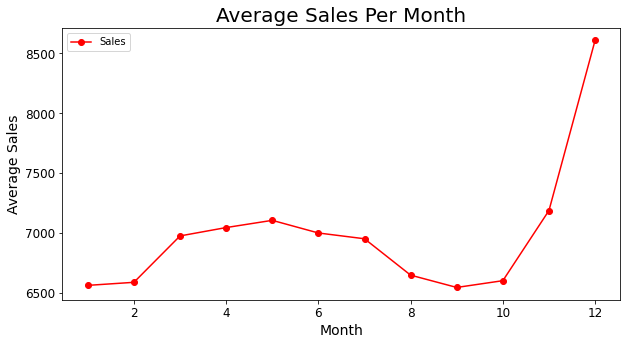

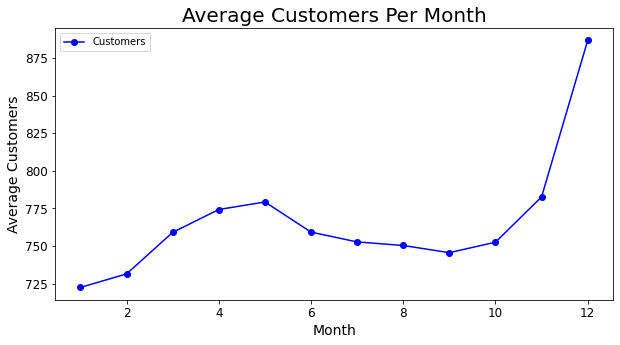

In [32]:
# Plotting the average sales per month 
axis = df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color='r')
axis.set_title('Average Sales Per Month',fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.tick_params(labelsize=12);

# Plotting the average number of customers visited stores per month
axis = df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = 'o', color='b')
axis.set_title('Average Customers Per Month',fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Customers', fontsize=14)
plt.tick_params(labelsize=12);

* High sales take place mostly in December. This is due to probably chrismas. 
* Similarly customers behaviours on purchasing highly correlated with sales and peaked high in December too!

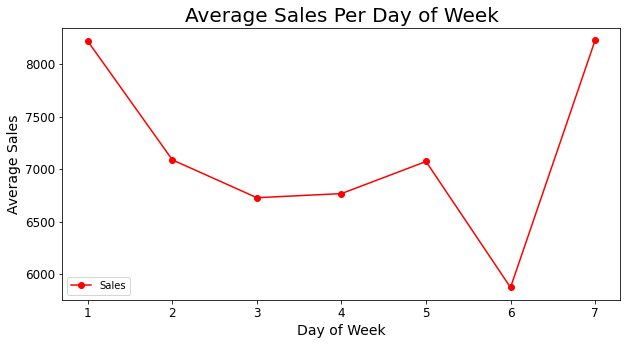

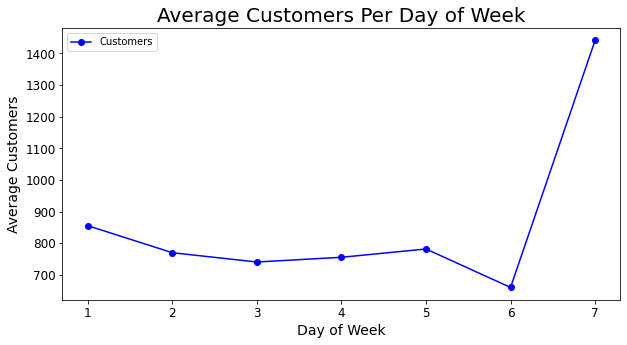

In [33]:
# Plotting the average sales per day of week where 7=Sunday
axis = df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color='r')
axis.set_title('Average Sales Per Day of Week',fontsize=20)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.tick_params(labelsize=12);


# Plotting the average number of customers visisted stores per day of week where 7=Sunday
axis = df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = 'o', color='b')
axis.set_title('Average Customers Per Day of Week',fontsize=20)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Average Customers', fontsize=14)
plt.tick_params(labelsize=12);

* High sales and customer happen to be on Sunday. 
* Minimum sales and customers happen to be on Saturday. 

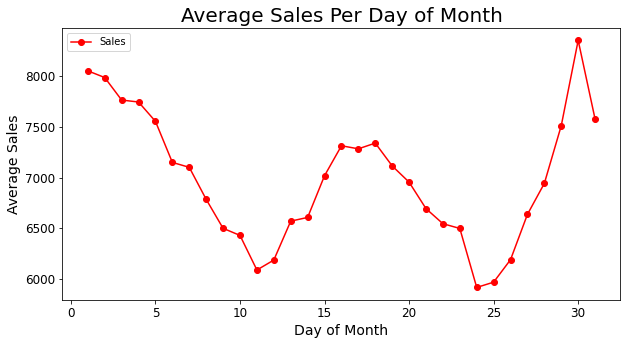

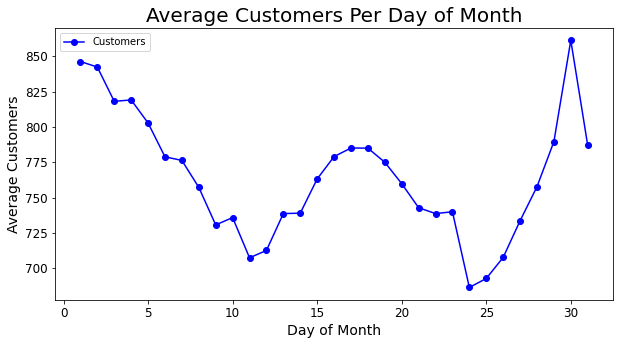

In [34]:
# Plotting the average sales per day of month
axis = df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color='r')
axis.set_title('Average Sales Per Day of Month', fontsize=20)
plt.xlabel('Day of Month', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.tick_params(labelsize=12);

# Plotting the average number of customers visisted stores per day of month
axis = df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = 'o', color='b')
axis.set_title('Average Customers Per Day of Month', fontsize=20)
plt.xlabel('Day of Month', fontsize=14)
plt.ylabel('Average Customers', fontsize=14)
plt.tick_params(labelsize=12);

* Most of sales and high number of customers happen to be on on the 30th and 1st of the month. 
* Minimum sales and number of customers happen to be on 24th of the month. 

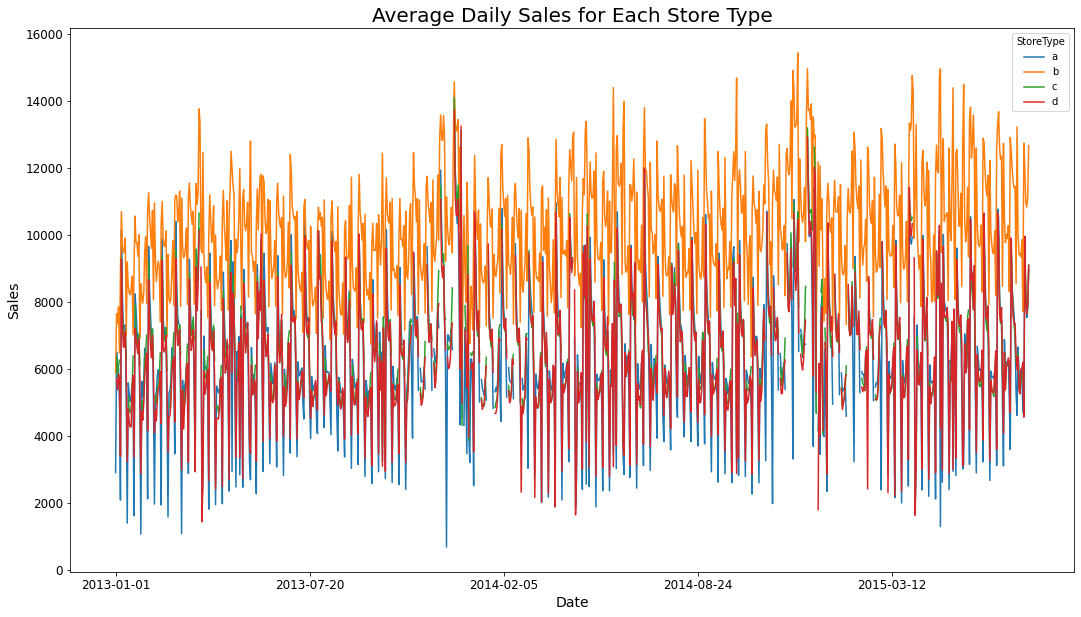

In [35]:
# Let's see which store has the highest sales.
fig, ax = plt.subplots(figsize = (18,10))
df.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)
ax.set_title('Average Daily Sales for Each Store Type', fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Sales",fontsize=14)
ax.tick_params(labelsize=12);

* Store type b has the highest average sales over past 2 years followed by store type d and c. 

* Store type a has the lowest average sales compared to others. 

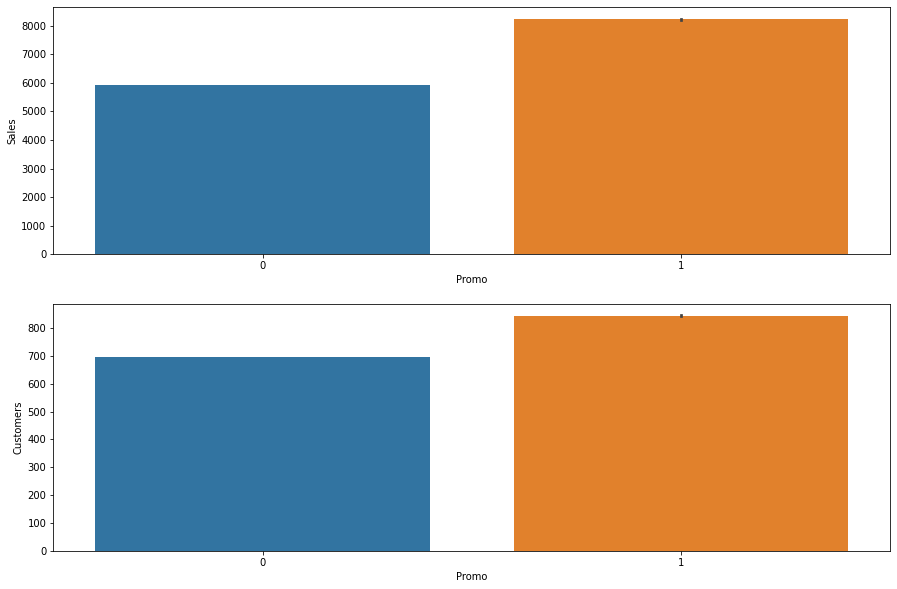

In [36]:
# Plotting a bar plot for promo vs sales, Promo=1, No Promo = 0
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.barplot(x= 'Promo', y = 'Sales', data = df);

# Plotting a bar plot for promo vs number of customers, Promo=1, No Promo = 0
plt.subplot(212)
sns.barplot(x='Promo', y = 'Customers', data=df);

* Applying Promotion (1) increases both sales and customers over time. 
* Running No Promotion (0) does not have any effect on increasing sale nor customers. 

# 4. Model Selection: Facebook Prophet

Prophet is an open source software released by Facebook's Core Data Science Team. Simply put, it is an approach to forecast time series data based on an additive model where non-linear trends are fit with seasonality effect (Yearly, Monthly, Weekly, Daily) and holidays as well. 

It works best with time series that have strong seasonal effects and several seasons of historical data. In otherwords, it can capture historical trend changes, for example, due to product launches or logging changes. 

Another good feature of fbprophet is that it can accept holidays where we can assume that holidays may have an effect on the overall sales either increasing or decreasing sales! For this project, there are actually 2 types of holidays namely StateHolidays and SchoolHolidays. 

* StateHoliday: It indicates a state holiday where majority of stores are closed. In the data we have a = public holiday, b = Easter holiday, c = Christmas and 0 = None. 

* SchoolHolidays: It indicates if the store was affected by the closure of public school (includes both public holiday and weekends)

**Note:**

Facebook prophet needs to rename the "Date" column and "Target (sales)" into "ds" and "y" respectively. 

References: 

https://research.fb.com/prophet-forecasting-at-scale/ 

https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [37]:
def fbp_sales_forecasting(data, store_id,period, holidays=None):
    
    # store_id is the id of the store we want to do sales forecasting
    # holiday is the dates where holidays took place, by default is none, but 
    # if client wants to add holidays effect into model, they have to provides dates
    # period  is the time frame to do forecasting. 
    
    # select data for that store_id
    df = data[data['Store'] == store_id]
    # rename the data and sales columns into ds and y, default varibles by fbprophet
    df = df[['Date','Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    # sort values by data
    df = df.sort_values('ds')
    
    # instantiate the model object
    model = Prophet(holidays=holidays)
    # fit the data 
    model.fit(df)
    # create a future object for interval to forecast 
    future = model.make_future_dataframe(periods = period)
    # forecasted results over given future interval 
    forecast = model.predict(future)
    
    # plotting the data for forecast period 
    figure = model.plot(forecast, xlabel = 'Date', ylabel = "Sales")
    # plotting the individual components of forecast: trends, weekly, yearly seasonality  
    figure2 = model.plot_components(forecast)
    

In [38]:
# Obtaining the date for schoolholidays to be used in model
school_holidays = df[df['SchoolHoliday'] == 1].loc[:, 'Date'].values

# Create a dataframe for school holidays 
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday' : 'school_holiday'})

# Obtaining the date for stateholidays to be used in model
state_holidays = df[(df['StateHoliday'] == 'a') | (df['StateHoliday'] == 'b') | (df['StateHoliday'] == 'c')].loc[:, 'Date'].values

# Create a dataframe for state holidays 
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday' : 'state_holiday'})

In [39]:
# Concatenate both school and state holidays 
holidays_dates = pd.concat((school_holidays, state_holidays))

holidays_dates

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


## 4.1 Forecast sales for store number 15

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


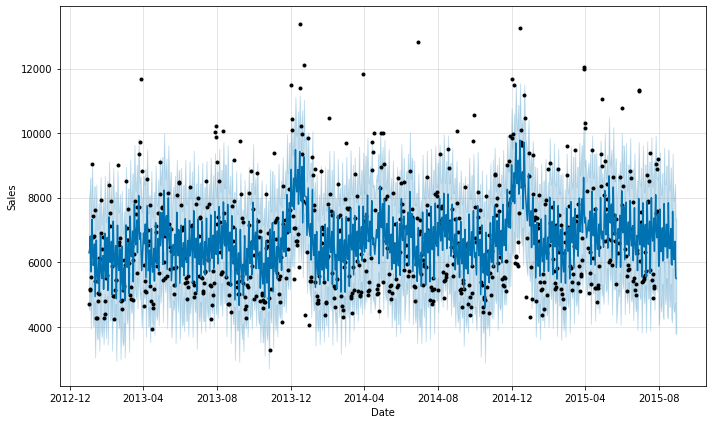

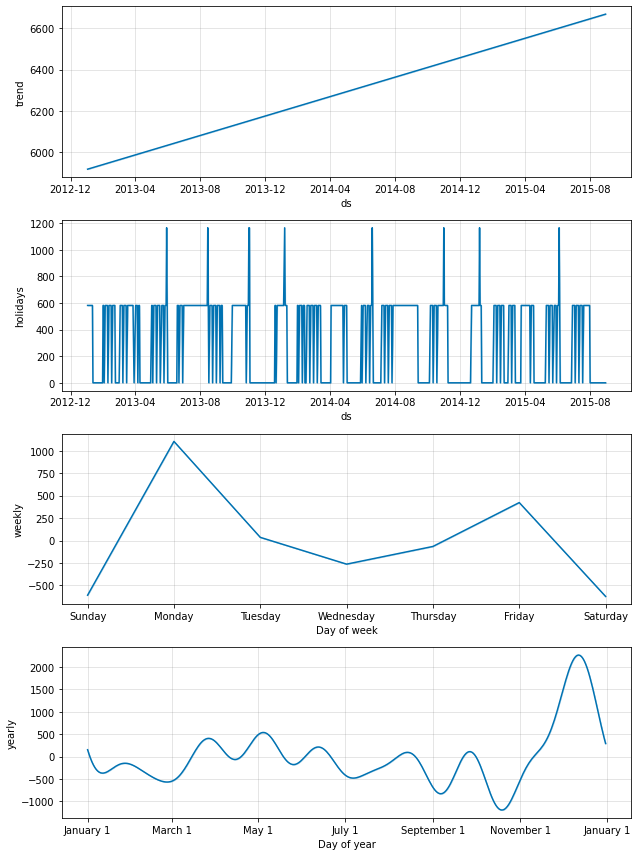

In [41]:
# Getting future sales for store 15 with holiday effect 
fbp_sales_forecasting(df, 15, 30, holidays_dates)

**Observations:** 
1. Sales for store 15 are going up.
2. Trends in day of the week show that most of the sales happended around Monday time frame. 
3. Trends in monthly sales show that most of the sales took place around December (Black Friday and Chrismas). There are some small peaks around April, May and August. 
4. There are some spikes on sales due to holidays around June, August, and December.  

# Discussion

A generic function is designed to implement sales forecasting using facebook prophet model over a certain time interval. I intentially choose 30 days forecasting and store number 15 for the purpose of demonstration. However, we can implement the same for different stores at different period. 

In addition, other ML models can be used to perform time series forecasting such as Linear Regression, Random Forest Regressor..etc. However, I usa fbprophet as it is my first time working on this model, gained new experience! 